**1. Dataset Selection:**

data publisher:
المركز الوطني للتمور والنخيل:

national center for palms and dates

https://ncpd.gov.sa/ar/reports-statistical

--------------------
data source:
data open platform
https://open.data.gov.sa/en/datasets/view/d0a9c6c5-ad58-40e7-be1e-772990d001ad

The data covers date exports, including the year, product classification, countries, export value, and shipped quantity. Each row represents an export transaction to a specific destination, reflecting the global distribution of dates.



In [1]:
from google.colab import files
uploaded = files.upload()

Saving datesExport.csv to datesExport.csv


2.**Data Preprocessing**



In [ ]:
import pandas as pd
import io
df = pd.read_csv("datesExport.csv", thousands=',')
df.head()

,Year,H.S Code,Commodity Description AR,Commodity Description EN,Country AR,Country EN,Value (S.R),Weight (kg)
0,2016,8041010,تمر طازج,FRESH DATES,اثيوبيا,ETHIOPIA,438457,431527
1,2016,8041010,تمر طازج,FRESH DATES,اريتيريا,ERITREA,84000,20000
2,2016,8041010,تمر طازج,FRESH DATES,اسبانيا,SPAIN,8020,1230
3,2016,8041010,تمر طازج,FRESH DATES,استراليا,AUSTRALIA,692235,96568
4,2016,8041010,تمر طازج,FRESH DATES,افغانسـتان,AFGHANISTAN,795996,150068


In [ ]:
#preview columns to delete the required one
for i, col in enumerate(df.columns):
    print(f"Column {i}: {col}")

Column 0: Year
Column 1: H.S Code
Column 2: Commodity Description AR
Column 3: Commodity Description EN
Column 4: Country AR 
Column 5: Country EN 
Column 6: Value (S.R)
Column 7: Weight (kg)


In [ ]:
col_index = [2,4]
df = df.drop(df.columns[col_index], axis=1)
print(df)

      Year  H.S Code Commodity Description EN  Country EN   Value (S.R)  \
0     2016   8041010              FRESH DATES     ETHIOPIA       438457   
1     2016   8041010              FRESH DATES      ERITREA        84000   
2     2016   8041010              FRESH DATES        SPAIN         8020   
3     2016   8041010              FRESH DATES    AUSTRALIA       692235   
4     2016   8041010              FRESH DATES  AFGHANISTAN       795996   
...    ...       ...                      ...          ...          ...   
1905  2023   8041029        OTHER DRIED DATES   MAURITANIA       921103   
1906  2023   8041029        OTHER DRIED DATES    MAURITIUS       265900   
1907  2023   8041029        OTHER DRIED DATES      NIGERIA        20269   
1908  2023   8041029        OTHER DRIED DATES  NETHERLANDS      1799410   
1909  2023   8041029        OTHER DRIED DATES    HONG KONG       152067   

      Weight (kg)  
0          431527  
1           20000  
2            1230  
3           96568  

In [ ]:
# renaming columns
df.columns = ['Year', 'H.S Code', 'Commodity Description', 'Country', 'Value (S.R)', 'Weight (kg)']


In [ ]:
print("missing valuse:")
print(df.isnull().sum())

missing valuse:
Year                     0
H.S Code                 0
Commodity Description    0
Country                  0
Value (S.R)              0
Weight (kg)              0
dtype: int64


In [ ]:
print("duplicates valuse:")
print(df.duplicated().sum())

duplicates valuse:
0


3- **Descriptive Statistics and Visualization**



In [ ]:
df.describe()

,Year,H.S Code,Value (S.R),Weight (kg)
count,"1,910","1,910","1,910","1,910"
mean,"2,020","8,041,019","4,096,767","945,083"
std,2,7,"15,620,508","4,374,352"
min,"2,016","8,041,010",1,1
25%,"2,018","8,041,010","23,011","4,740"
50%,"2,020","8,041,021","264,998","43,072"
75%,"2,022","8,041,021","1,605,464","295,474"
max,"2,023","8,041,029","189,337,551","72,631,242"


<ipython-input-73-75042e6d5f68>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_grouped.values, y=df_grouped.index, palette='viridis')


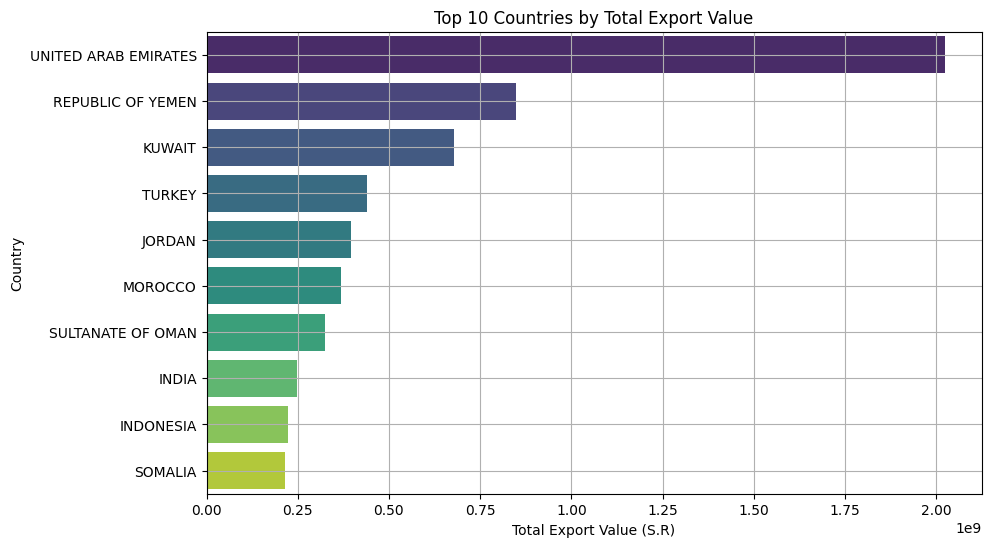

In [ ]:
#Bar Plot
df_grouped = df.groupby('Country')['Value (S.R)'].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=df_grouped.values, y=df_grouped.index, palette='viridis')
plt.title('Top 10 Countries by Total Export Value')
plt.xlabel('Total Export Value (S.R)')
plt.ylabel('Country')
plt.grid(True)
plt.show()


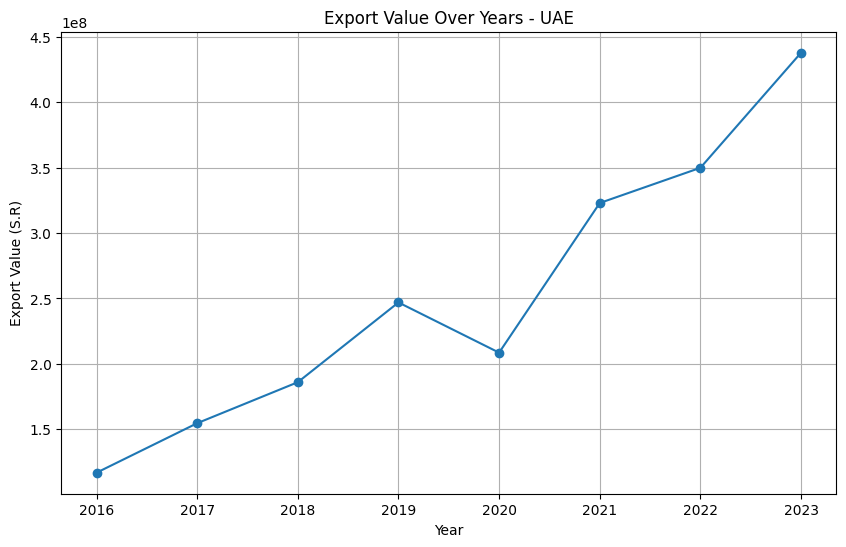

In [ ]:
#. Line Plot: Export Value Over Years - UAE
country_data = df[df['Country'] == 'UNITED ARAB EMIRATES']

country_grouped = country_data.groupby('Year')['Value (S.R)'].sum()

plt.figure(figsize=(10,6))
plt.plot(country_grouped.index, country_grouped.values, marker='o')
plt.title('Export Value Over Years - UAE')
plt.xlabel('Year')
plt.ylabel('Export Value (S.R)')
plt.grid(True)
plt.show()


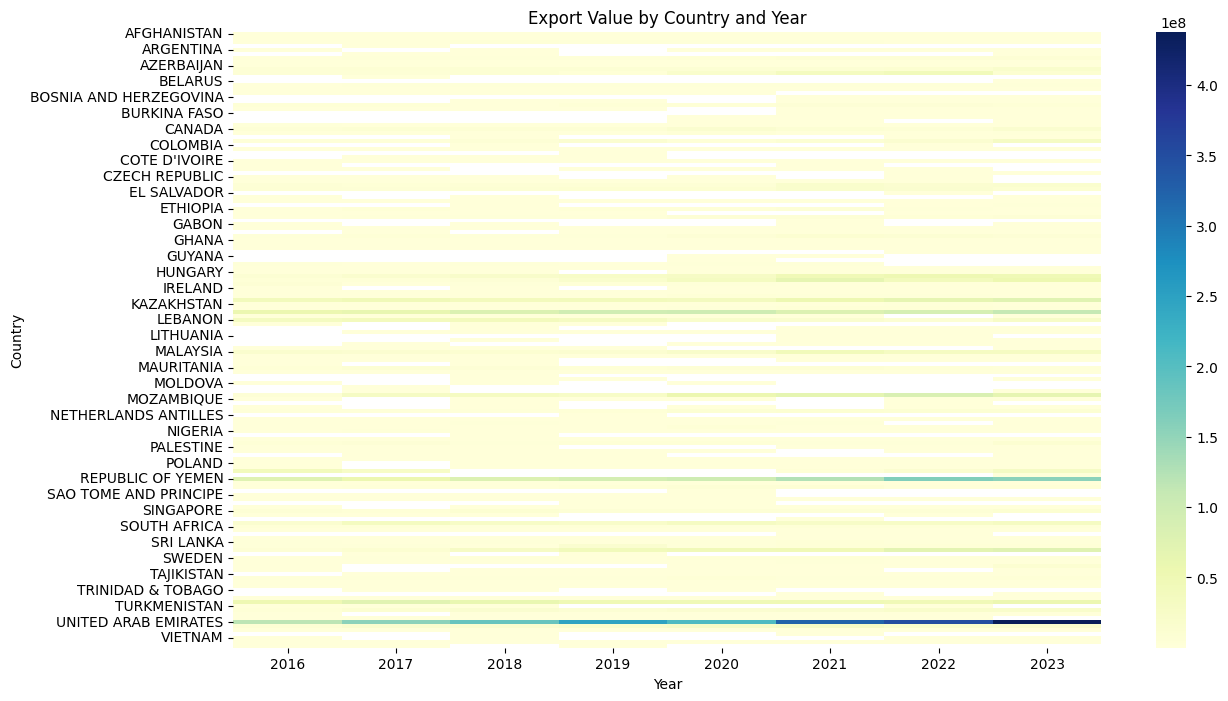

In [ ]:
#  Heatmap: Export Value by Country and Year
heatmap_data = df.pivot_table(values='Value (S.R)', index='Country', columns='Year', aggfunc='sum')

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Export Value by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


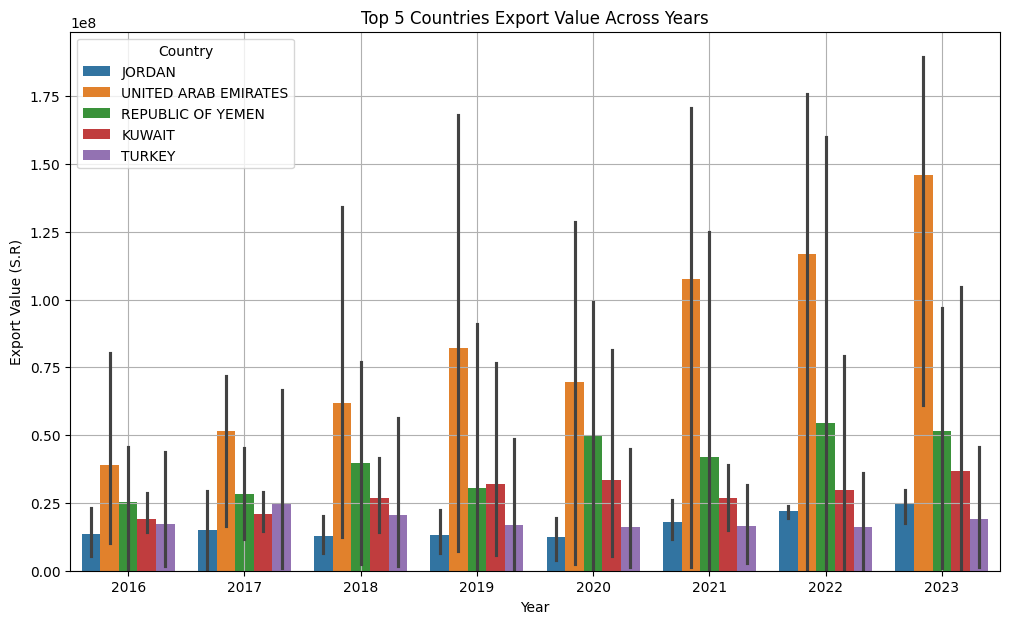

In [ ]:
#   Grouped Bar Plot: Top 5 Countries Export Value Across Years
top_countries = df.groupby('Country')['Value (S.R)'].sum().sort_values(ascending=False).head(5).index

df_top = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12,7))
sns.barplot(x='Year', y='Value (S.R)', hue='Country', data=df_top)
plt.title('Top 5 Countries Export Value Across Years')
plt.xlabel('Year')
plt.ylabel('Export Value (S.R)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


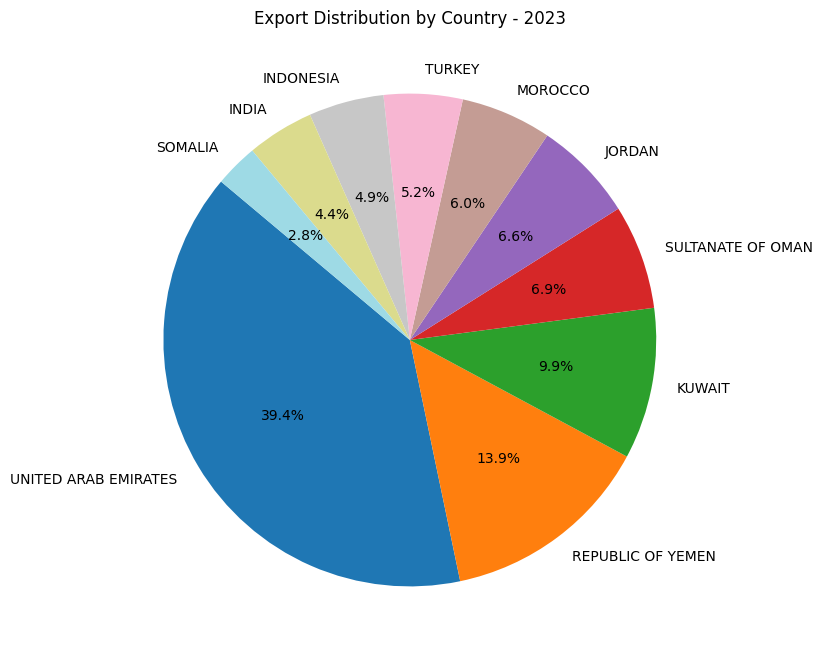

In [ ]:
# Pie Chart Export Distribution by Country - 2023

df_2023 = df[df['Year'] == 2023]

pie_data = df_2023.groupby('Country')['Value (S.R)'].sum()

plt.figure(figsize=(8,8))
pie_data.sort_values(ascending=False).head(10).plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Export Distribution by Country - 2023')
plt.ylabel('')
plt.show()


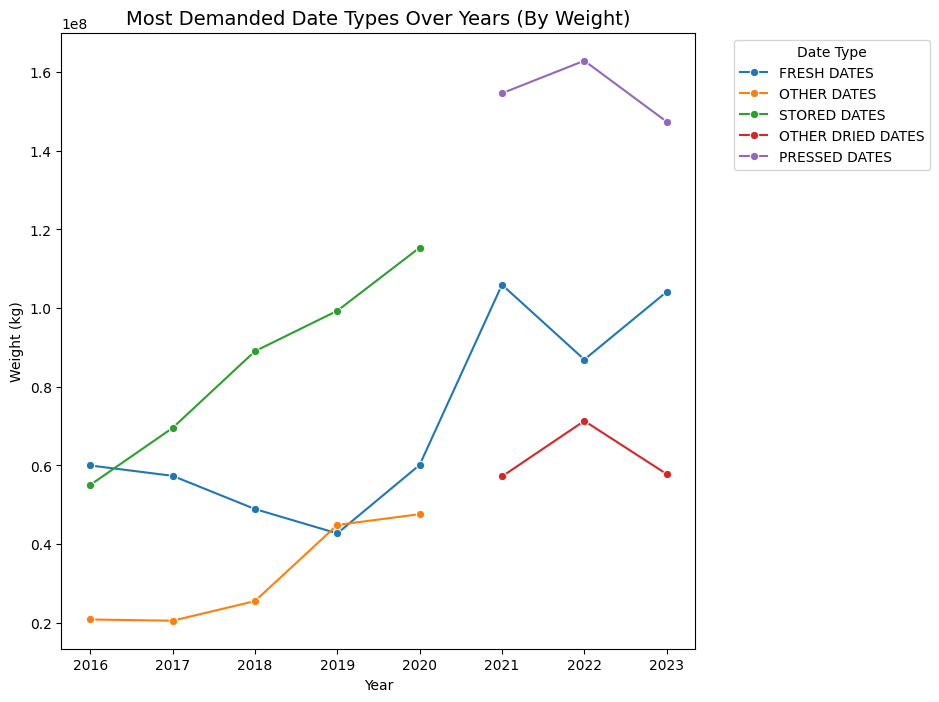

In [ ]:
# Multiple Line Chart
grouped = df.groupby(['Year', 'Commodity Description']).agg({
    'Value (S.R)': 'sum',
    'Weight (kg)': 'sum'
}).reset_index()

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.lineplot(data=grouped, x='Year', y='Weight (kg)', hue='Commodity Description', marker="o")
plt.title('Most Demanded Date Types Over Years (By Weight)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.legend(title='Date Type', bbox_to_anchor=(1.05, 1), loc='upper left')

4. **PCA Implementation**


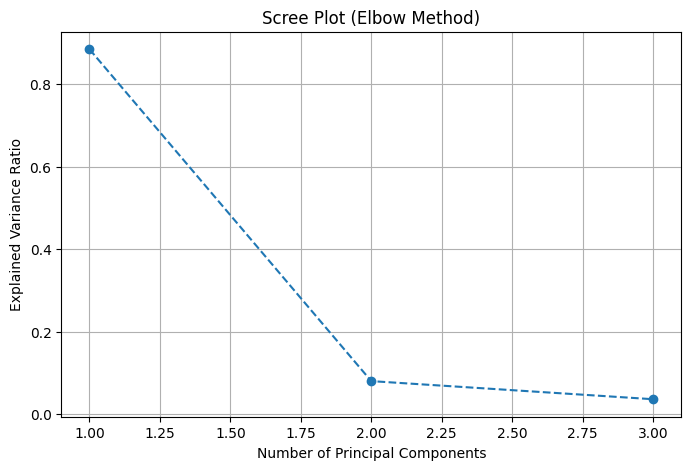

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot)

pca = PCA()
pca.fit(pivot_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot (Elbow Method)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


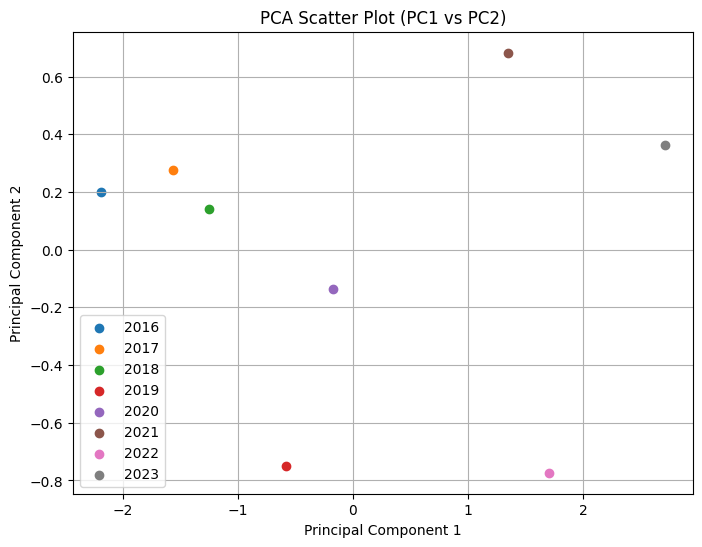

In [ ]:
pca_2 = PCA(n_components=2)
principal_components = pca_2.fit_transform(pivot_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Year'] = pivot.index

-plt.figure(figsize=(8,6))
for i in range(pca_df.shape[0]):
    plt.scatter(pca_df['PC1'][i], pca_df['PC2'][i], label=pca_df['Year'][i])

plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


5- **Classification:**




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_datesExport.csv to cleaned_datesExport (1).csv


<ipython-input-137-9c43a8bfa8de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight (kg)'] = pd.to_numeric(df['Weight (kg)'], errors='coerce')
<ipython-input-137-9c43a8bfa8de>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight Category'] = df['Weight (kg)'].apply(classify_weight)


Classification Report:
               precision    recall  f1-score   support

        High       0.43      0.51      0.47       135
         Low       0.47      0.62      0.54       123
      Medium       0.34      0.17      0.23       124

    accuracy                           0.43       382
   macro avg       0.41      0.43      0.41       382
weighted avg       0.42      0.43      0.41       382

Confusion Matrix:
 [[69 43 23]
 [29 76 18]
 [62 41 21]]


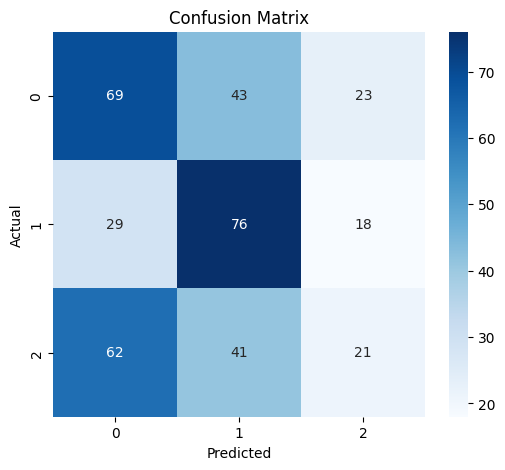

Predict the 2024 Exports Based on Date Type
  Commodity Description Predicted Weight Category 2024
0           FRESH DATES                           High
1          STORED DATES                            Low
2           OTHER DATES                         Medium
3         PRESSED DATES                            Low
4     OTHER DRIED DATES                         Medium


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = df[['Year', 'Commodity Description', 'Weight (kg)']]

df['Weight (kg)'] = pd.to_numeric(df['Weight (kg)'], errors='coerce')

low_limit = df['Weight (kg)'].quantile(0.33)
high_limit = df['Weight (kg)'].quantile(0.66)

def classify_weight(weight):
    if weight <= low_limit:
        return 'Low'
    elif weight <= high_limit:
        return 'Medium'
    else:
        return 'High'

df['Weight Category'] = df['Weight (kg)'].apply(classify_weight)

le = LabelEncoder()
df['Commodity Code'] = le.fit_transform(df['Commodity Description'])

X = df[['Year', 'Commodity Code']]
y = df['Weight Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


unique_commodities = df['Commodity Code'].unique()
year_2024 = np.full(shape=unique_commodities.shape, fill_value=2024)

X_2024 = pd.DataFrame({
    'Year': year_2024,
    'Commodity Code': unique_commodities
})


predictions_2024 = clf.predict(X_2024)


result_2024 = pd.DataFrame({
    'Commodity Description': le.inverse_transform(unique_commodities),
    'Predicted Weight Category 2024': predictions_2024
})

print("Predict the 2024 Exports Based on Date Type")
print(result_2024)